#  Brain-body-behavior descriptors ME

## Task and reference performance
**Walker-v0** -> walk forward on an even terrain; usual performance around 8-10

## Descriptors recap
- Brain: nns descriptors
- Body: (1) n active voxels / n voxels, (2) elongation
- Behavior: (1) y-velocity (median of fft), (2) % of contact with ground

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
%matplotlib inline

In [2]:
dfs = []
for sampler in ["all", "s1", "s2", "s3", "ga"]:
    for seed in range(10):
        if sampler != "ga":
            tmp_df = pd.read_csv(f"../results/me_nn/evo-body-10x10-walker-{sampler}_{seed}.csv")
        else:
            tmp_df = pd.read_csv(f"../results/ga/evo-body-nn-10x10-walker_{seed}.csv")
        tmp_df["sampler"] = sampler
        tmp_df["seed"] = seed
        dfs.append(tmp_df)
df = pd.concat(dfs)
df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,sampler,seed
0,1,0.562116,2.821863,1.579132,-0.020165,1.367188,6.347656,1.953125,11.433460,2024-08-12 16:42:57.189083,0.0,all,0
1,2,0.562116,4.191794,5.345062,-0.012267,1.757812,8.398438,2.343750,5.578582,2024-08-12 16:43:02.767961,0.0,all,0
2,3,0.562116,6.079382,8.130862,-0.647105,2.246094,9.863281,2.636719,5.605529,2024-08-12 16:43:08.373949,0.0,all,0
3,4,0.562116,7.028851,10.669348,-0.444910,2.343750,11.328125,3.027344,5.565599,2024-08-12 16:43:13.939902,0.0,all,0
4,5,0.562116,8.077906,14.320849,-0.712019,2.441406,13.085938,3.222656,5.470364,2024-08-12 16:43:19.410662,0.0,all,0


In [3]:
final_df = df[df["iteration"] == max(df["iteration"])]
final_df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,sampler,seed
3999,4000,5.891040,239.98662,1490.6387,825.5987,10.644531,55.957030,46.093750,5.757990,2024-08-12 22:56:35.212428,0.0,all,0
3999,4000,10.587589,287.20276,2791.7930,3071.0860,10.156250,53.710938,52.246094,5.708604,2024-08-13 05:20:13.065034,0.0,all,1
3999,4000,10.579874,366.28497,2522.1582,2444.5156,11.328125,53.613280,58.300780,5.813078,2024-08-13 11:45:01.502118,0.0,all,2
3999,4000,10.512278,468.45917,3974.3047,3249.0703,8.496094,56.445312,51.464844,5.901505,2024-08-13 18:10:42.954198,0.0,all,3
3999,4000,10.108876,361.39493,3020.8057,1909.7031,10.351562,51.171875,44.921875,5.875337,2024-08-14 00:38:54.786038,0.0,all,4


## Fitness results

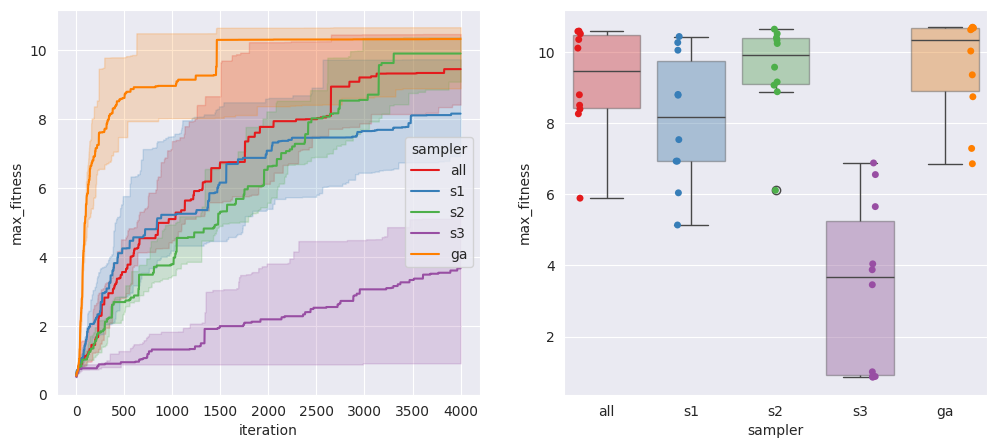

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(df,
             x="iteration",
             y="max_fitness",
             estimator="median",
             errorbar=("pi", 50),
             hue="sampler",
             palette="Set1",
             ax=axs[0]
             )
sns.boxplot(
    final_df,
    x="sampler",
    y="max_fitness",
    hue="sampler",
    palette="Set1",
    boxprops={'alpha': 0.4},
    ax=axs[1]
)
sns.stripplot(final_df,
              x="sampler",
              y="max_fitness",
              hue="sampler",
              palette="Set1",
              dodge=True,
              ax=axs[1])
plt.show()

In [5]:
pairs = []
for s1 in final_df.sampler.unique():
    for s2 in final_df.sampler.unique():
        if s1 != s2 and (s2, s1) not in pairs:
            pairs.append((s1, s2))
            fits1 = final_df[final_df["sampler"] == s1]["max_fitness"].to_list()
            fits2 = final_df[final_df["sampler"] == s2]["max_fitness"].to_list()
            _, p_value = ranksums(fits1, fits2)
            print(f"{s1} vs {s2} -> {p_value}")

all vs s1 -> 0.15092695006671628
all vs s2 -> 0.5453496680111236
all vs s3 -> 0.00028511808363161265
all vs ga -> 0.22647606604348625
s1 vs s2 -> 0.0493661947519327
s1 vs s3 -> 0.0006697294490218271
s1 vs ga -> 0.05878172135535886
s2 vs s3 -> 0.00028511808363161265
s2 vs ga -> 0.40567889528505297
s3 vs ga -> 0.00021218287122257823


## Coverage results
- sampling from repertoire x fosters diversity/coverage in x
- sampling from all repertoires is the second-best option for each, i.e., the best trade-off

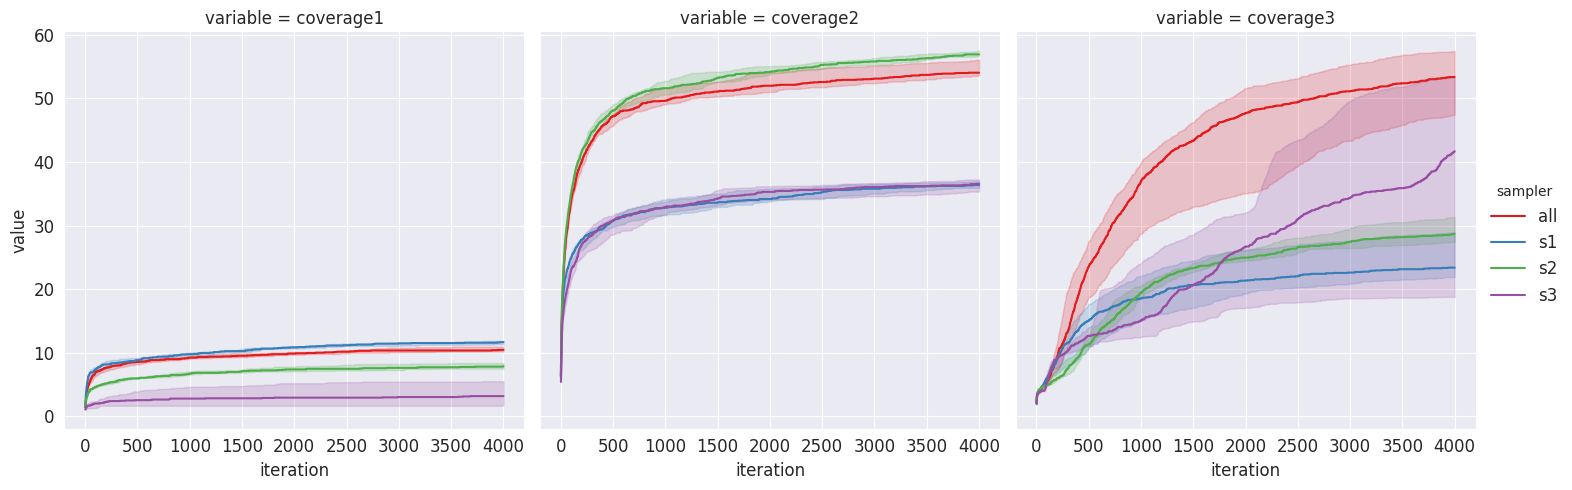

In [14]:
df_wide = pd.melt(df, id_vars=["iteration", "max_fitness", "time", "current_time", "sampler", "seed"],
                  value_vars=["coverage1", "coverage2", "coverage3"])
sns.relplot(df_wide,
            x="iteration",
            y="value",
            col="variable",
            hue="sampler",
            palette="Set1",
            kind="line",
            estimator="median",
            errorbar=("pi", 50),
            )
plt.show()

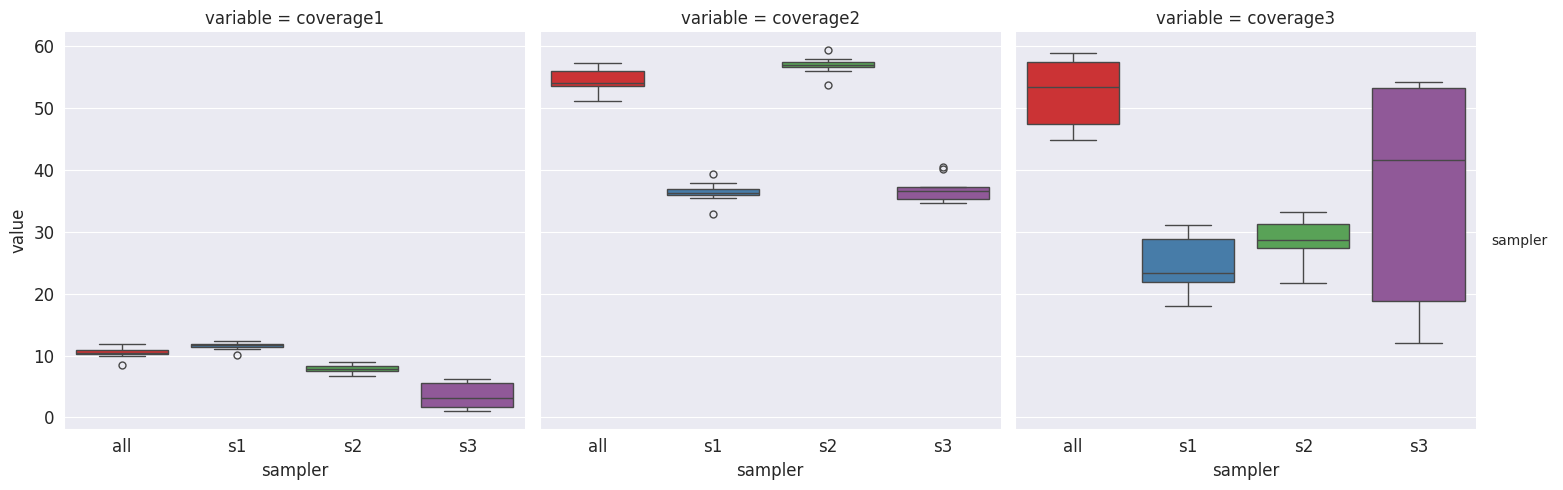

In [15]:
final_df_wide = df_wide[df_wide["iteration"] == max(df_wide["iteration"])]
sns.catplot(final_df_wide,
            x="sampler",
            y="value",
            col="variable",
            hue="sampler",
            palette="Set1",
            kind="box",
            )
plt.show()

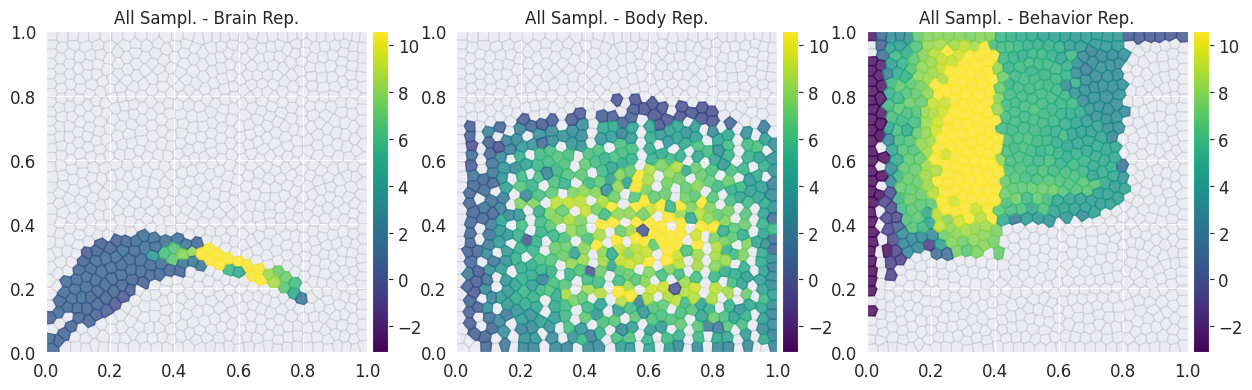

In [16]:
samplers = ["all"]
rep_seed = 1
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
reps = {
    0: "Brain",
    1: "Body",
    2: "Behavior"
}
sams = {
    "all": "All",
}
min_fit, max_fit = jnp.inf, -jnp.inf
for i, sampler in enumerate(samplers):
    base_path = f"../results/me_nn/evo-body-10x10-walker-{sampler}_{rep_seed}"
    for r, ax in enumerate(axs):
        centroids = jnp.load(f"{base_path}/r{r + 1}_centroids.npy")
        fitnesses = jnp.load(f"{base_path}/r{r + 1}_fitnesses.npy")
        curr_min_fit, curr_max_fit = min(fitnesses[fitnesses > -jnp.inf]), max(fitnesses)
        if curr_min_fit < min_fit: min_fit = curr_min_fit
        if curr_max_fit > max_fit: max_fit = curr_max_fit

for i, sampler in enumerate(samplers):
    base_path = f"../results/me_nn/evo-body-10x10-walker-{sampler}_{rep_seed}"
    for r, ax in enumerate(axs):
        centroids = jnp.load(f"{base_path}/r{r + 1}_centroids.npy")
        fitnesses = jnp.load(f"{base_path}/r{r + 1}_fitnesses.npy")
        plot_2d_map_elites_repertoire(centroids, fitnesses, 0, 1, ax=ax, vmin=min_fit, vmax=max_fit)
        ax.set_title(f"{sams[sampler]} Sampl. - {reps[r]} Rep.")
        ax.set_xlabel("")
        ax.set_ylabel("")
plt.show()

## Coverage transfer

In [2]:
samplers = ["all", "s1", "s2", "s3"]
seeds = range(4)
repertoires = range(1, 4)
coverage_dfs = []
for sampler in samplers:
    for repertoire in repertoires:
        for seed in seeds:
            tmp_df = pd.read_csv(f"../results/coverage/nn_evo-body-10x10-walker-{sampler}_{seed}_g{repertoire}.csv")
            tmp_df["sampler"] = sampler
            tmp_df["seed"] = seed
            tmp_df["origin_repertoire"] = repertoire
            coverage_dfs.append(tmp_df)
coverage_df = pd.concat(coverage_dfs)
coverage_df = pd.melt(coverage_df, id_vars=["max_fitness", "sampler", "seed", "origin_repertoire"],
                      value_vars=["coverage1", "coverage2", "coverage3"])
coverage_df = coverage_df.rename(columns={"variable": "destination_repertoire", "value": "coverage"})
coverage_df["destination_repertoire"] = coverage_df["destination_repertoire"].apply(
    lambda x: int(x.replace("coverage", "")))
coverage_df.head()

,max_fitness,sampler,seed,origin_repertoire,destination_repertoire,coverage
0,5.891040,all,0,1,1,10.644531
1,10.587589,all,1,1,1,10.156250
2,10.579874,all,2,1,1,11.328125
3,10.512278,all,3,1,1,8.496094
4,5.891040,all,0,2,1,4.199219


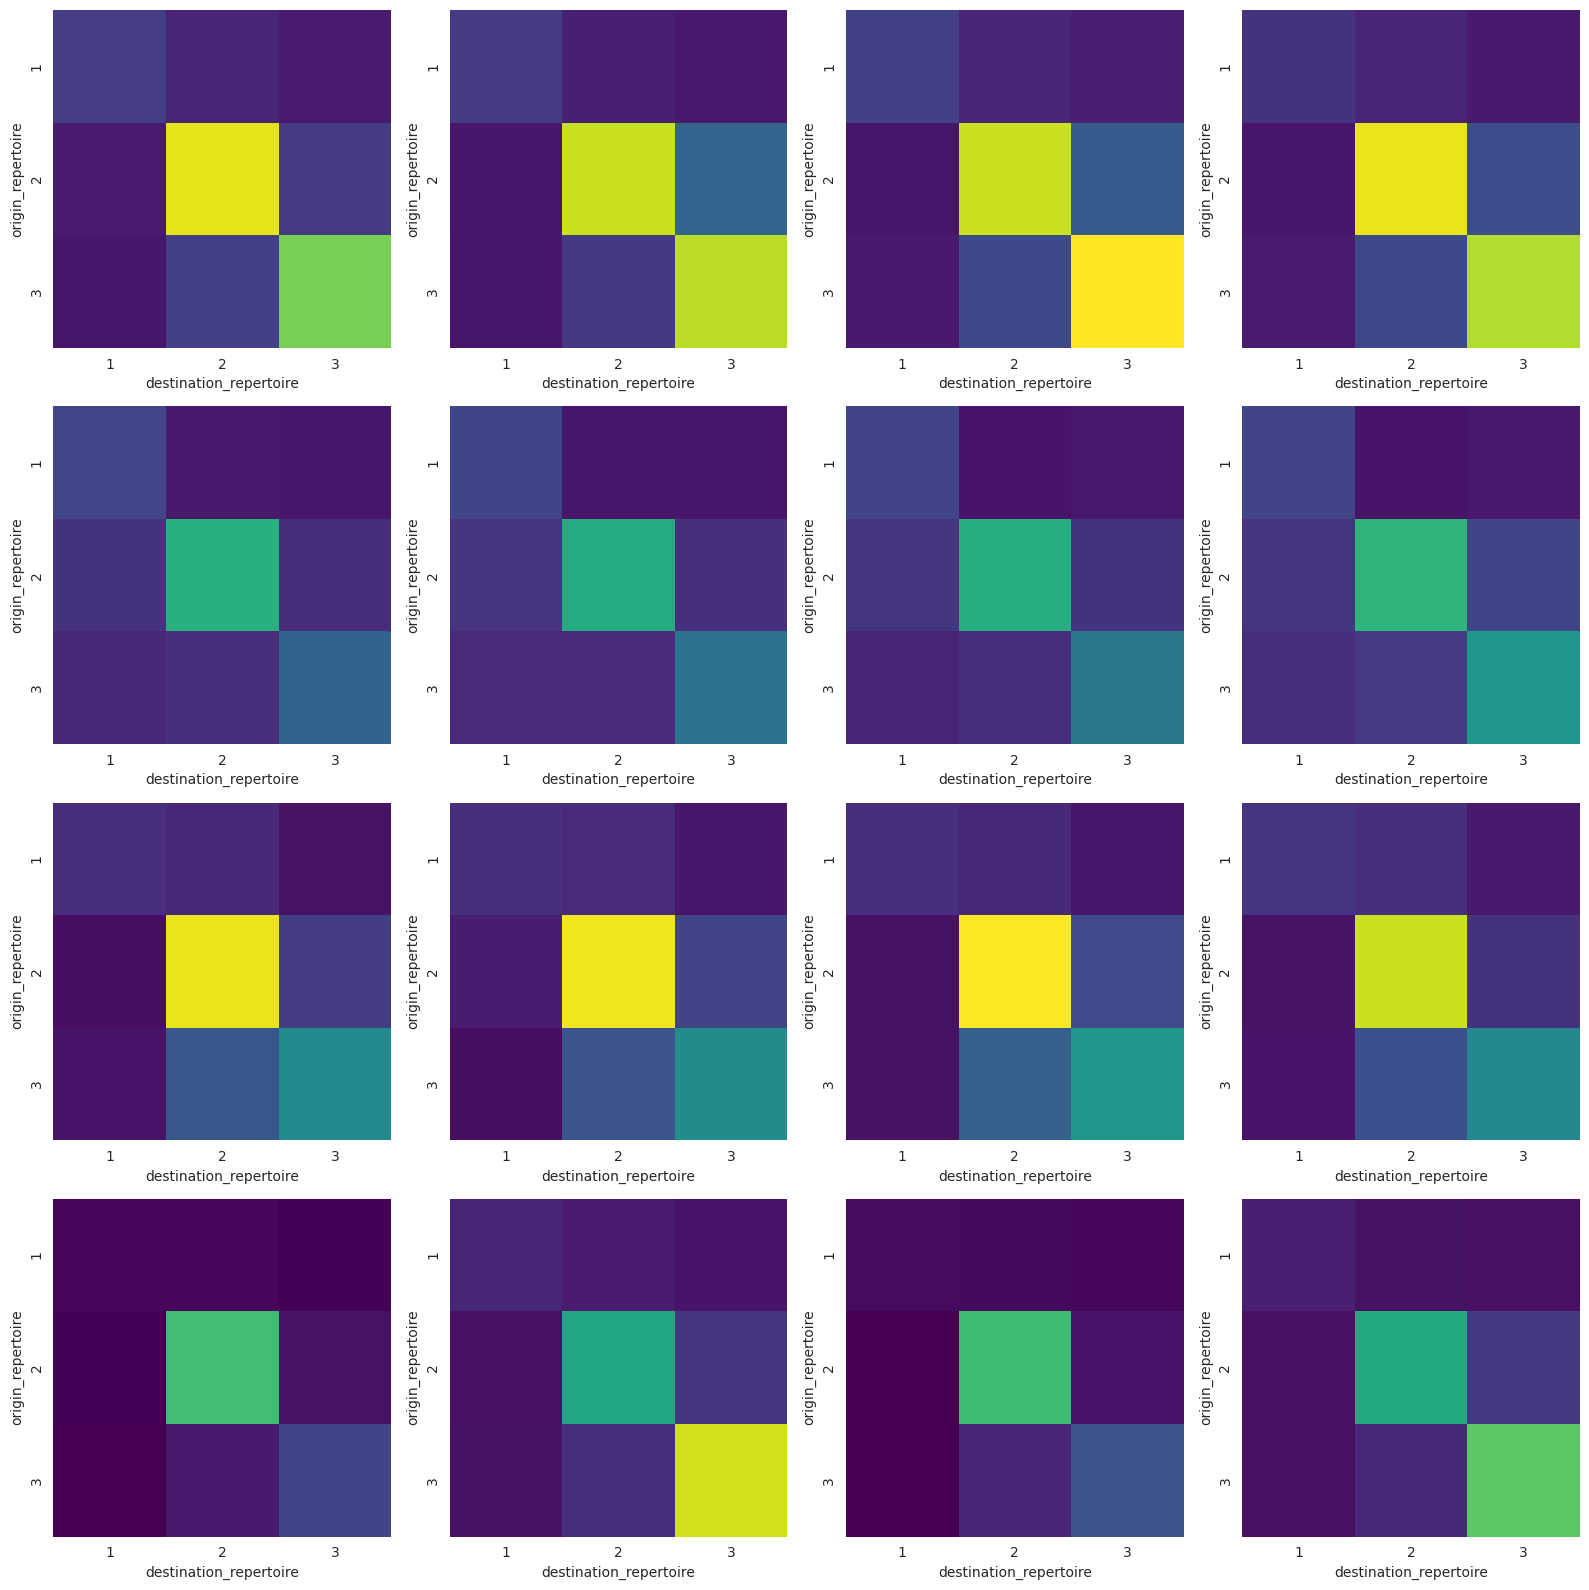

In [5]:
multiplier = 4
max_coverage = max(coverage_df["coverage"])
fig, axes = plt.subplots(len(samplers), len(seeds), figsize=(multiplier * len(seeds), multiplier * len(samplers)))
for seed_id, seed in enumerate(seeds):
    for sampler_id, sampler in enumerate(samplers):
        tmp_coverage_df = coverage_df[(coverage_df["sampler"] == sampler) & (coverage_df["seed"] == seed)]
        tmp_hm_data = tmp_coverage_df.pivot(index="origin_repertoire", columns="destination_repertoire",
                                            values="coverage")
        sns.heatmap(tmp_hm_data, ax=axes[sampler_id][seed_id], cmap="viridis", vmin=0, vmax=max_coverage, cbar=False)
plt.tight_layout()
plt.show()

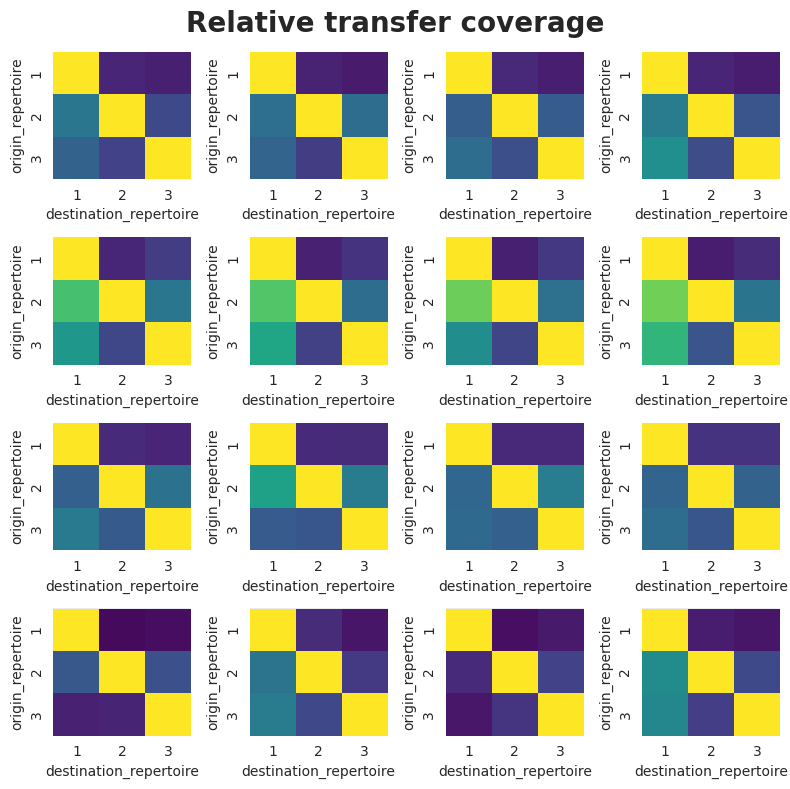

In [16]:
multiplier = 2
# max_coverage = max(coverage_df["coverage"])
fig, axes = plt.subplots(len(samplers), len(seeds), figsize=(multiplier * len(seeds), multiplier * len(samplers)))
for seed_id, seed in enumerate(seeds):
    for sampler_id, sampler in enumerate(samplers):
        tmp_coverage_df = coverage_df[(coverage_df["sampler"] == sampler) & (coverage_df["seed"] == seed)]
        c_1 = \
            tmp_coverage_df[
                (tmp_coverage_df["origin_repertoire"] == 1) & (tmp_coverage_df["destination_repertoire"] == 1)][
                "coverage"].iloc[0]
        c_2 = \
            tmp_coverage_df[
                (tmp_coverage_df["origin_repertoire"] == 2) & (tmp_coverage_df["destination_repertoire"] == 2)][
                "coverage"].iloc[0]
        c_3 = \
            tmp_coverage_df[
                (tmp_coverage_df["origin_repertoire"] == 3) & (tmp_coverage_df["destination_repertoire"] == 3)][
                "coverage"].iloc[0]
        clear_coverage_df = tmp_coverage_df.copy()
        clear_coverage_df["relative_coverage"] = clear_coverage_df.apply(
            lambda row: (row["coverage"] / c_1) if row["destination_repertoire"] == 1 else
            ((row["coverage"] / c_2) if row["destination_repertoire"] == 2 else (row["coverage"] / c_3)),
            axis=1)
        tmp_hm_data = clear_coverage_df.pivot(index="origin_repertoire", columns="destination_repertoire",
                                              values="relative_coverage")
        sns.heatmap(tmp_hm_data, ax=axes[sampler_id][seed_id], cmap="viridis", vmin=0, vmax=1, cbar=False)

fig.suptitle("Relative transfer coverage", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()